## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [9]:
from __future__ import print_function, division
import sys
import os
import numpy as np
import pylab as pl
%pylab inline
import pandas as pd
import statsmodels.api as sm
import json
import os

#s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)





Populating the interactive namespace from numpy and matplotlib


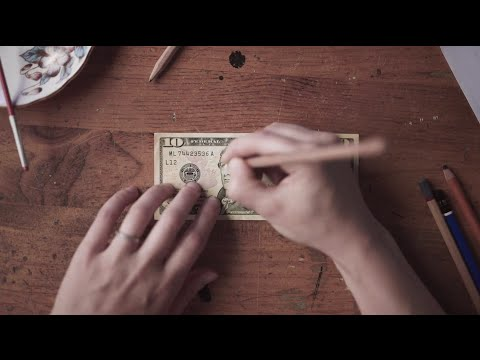

In [10]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [11]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [12]:
allmales = {}

In [13]:
allmales['all'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls", header=9, skiprows=(0-9))
allmales['white'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls", header=9, skiprows=(0-9))
allmales['black'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls", header=9, skiprows=(0-9))
allmales['asian'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls", header=9, skiprows=(0-9))
allmales['hispanic'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls", header=9, skiprows=(0-9))






In [14]:
allfemales = {}

In [15]:
allfemales['all'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls", header=9, skiprows=(0-9))
allfemales['white'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls", header=9, skiprows=(0-9))
allfemales['black'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls", header=9, skiprows=(0-9))
allfemales['asian'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls", header=9, skiprows=(0-9))
allfemales['hispanic'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls", header=9, skiprows=(0-9))




In [16]:
#allfemales dictionaries
type(allfemales)

dict

In [17]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [18]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [19]:
# allmales should be dictionaries
type(allmales)

dict

In [20]:
allmales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
2,Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092


In [21]:
allmales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

# Descriptive phase: 


In [23]:
# just run this cell to get an idea of the data
#going through the various data frames and is giving a column by column info on each column
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### asian
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean          809.478261            150.347826         42.413043   
std          1476.967354            439.113765         59.593652   
min             2.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max          5648.000000           2178.000000        224.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean          53.934783         59.434783           56.717391   
std           82.427989         95.528623           93.491215   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN         

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        12310.782609           2214.586957        673.413043   
std         19885.397175           5970.622977        776.907047   
min            76.000000              0.000000          4.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         74382.000000          30286.000000       2583.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         781.195652        971.630435         1036.956522   
std         1023.663283       1566.965750         1730.981173   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

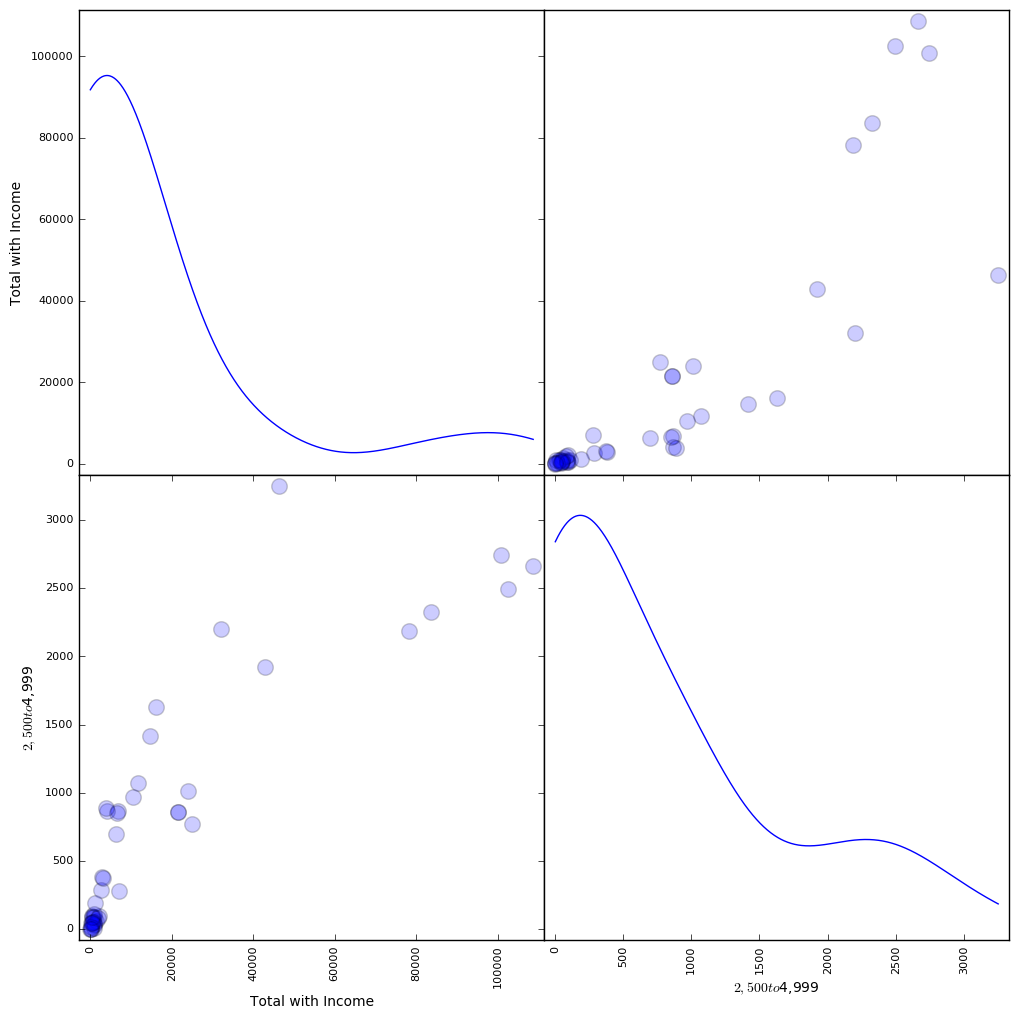

In [30]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']], alpha=0.2,
                   linewidth= 1, s=500, figsize=(12,12), 
                        diagonal='kde')                

In [31]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [32]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

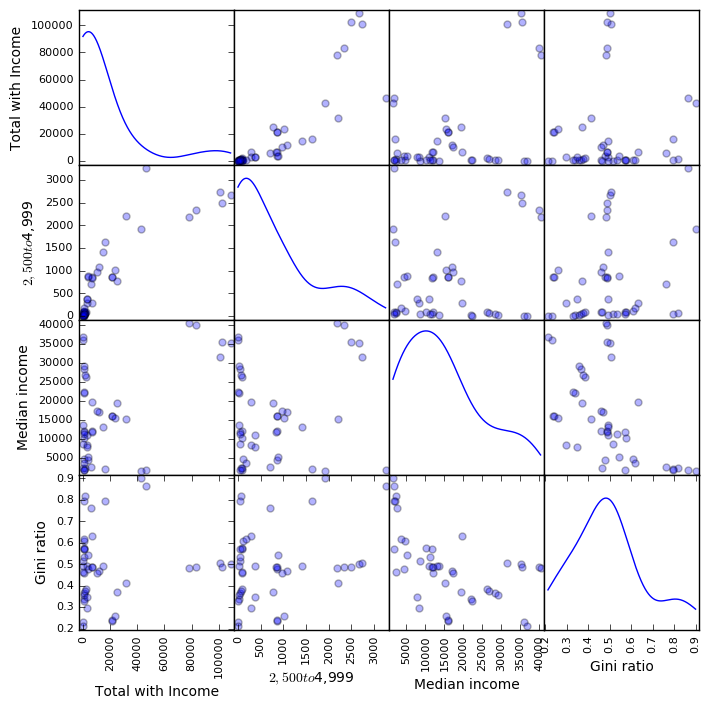

In [40]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 1, s=100, alpha=0.3, figsize=(8,8), 
                        diagonal='kde')    

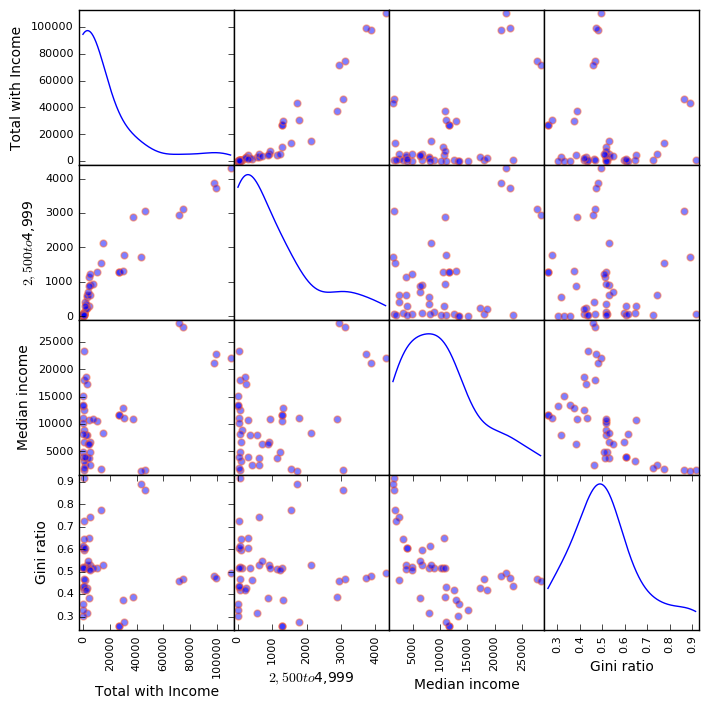

In [43]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 1, s=100, color='#ff6633',figsize=(8,8), 
                        diagonal='kde') 

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

In [45]:
male_incomes = []

In [46]:
male_incomes.append(allmales['white']['Median income'][1])
male_incomes.append(allmales['black']['Median income'][1])
male_incomes.append(allmales['asian']['Median income'][1])
male_incomes.append(allmales['hispanic']['Median income'][1])


In [47]:
male_incomes

[40122.0, 24855.0, 40153.0, 25411.0]

In [48]:
female_incomes = []

In [49]:
female_incomes.append(allfemales['white']['Median income'][1])
female_incomes.append(allfemales['black']['Median income'][1])
female_incomes.append(allfemales['asian']['Median income'][1])
female_incomes.append(allfemales['hispanic']['Median income'][1])

In [50]:
female_incomes

[23780.0, 20044.0, 24840.0, 25411.0]

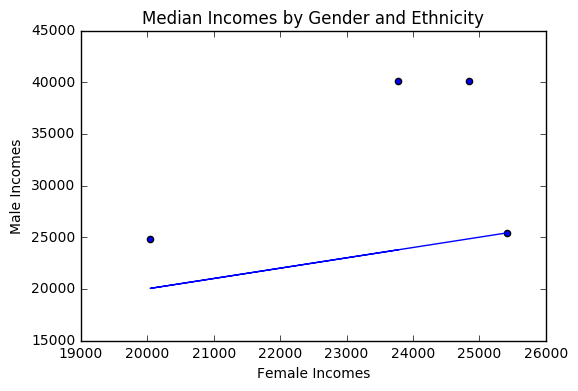

In [52]:
pl.scatter(female_incomes, male_incomes)
plt.title('Median Incomes by Gender and Ethnicity')
pl.xlabel('Female Incomes')
pl.ylabel('Male Incomes')
pl.plot(female_incomes, female_incomes)
#for some reason I have a datapoint where the genders are equal



In [53]:
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

     


(7747.87263558829, 0.42016760785472707)

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

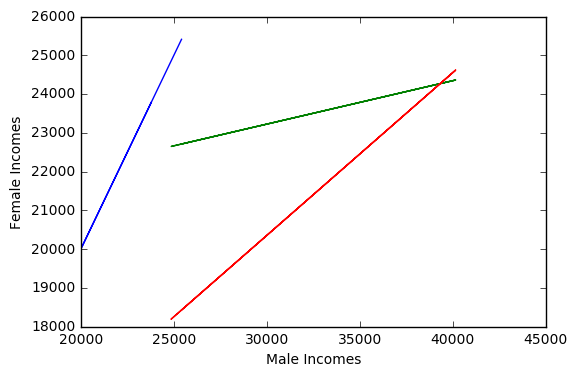

In [54]:
pl.xlabel('Male Incomes')
pl.ylabel('Female Incomes')
pl.plot(female_incomes, female_incomes)
pl.plot(male_incomes, np.poly1d(np.polyfit(male_incomes, female_incomes, 1))(male_incomes))
pl.plot(np.array(male_incomes), beta1*np.array(male_incomes) + beta0)
#pl.plot(total_males_allincomes, total_females_allincomes)

   

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

In [ ]:
#...


# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [86]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

Slopes for the regression done with different methods:
	 polyfit 0.59
	 direct residual minimization: 0.59
	 direct residual minimization not forcing 0 intercept: 0.59
	 analytical: 0.62
[ 0.5938435] 1293.76404877 0.62234483904 1674.6926881 0.593843504343 SpearmanrResult(correlation=0.94727098922963382, pvalue=6.4819159105555847e-89)


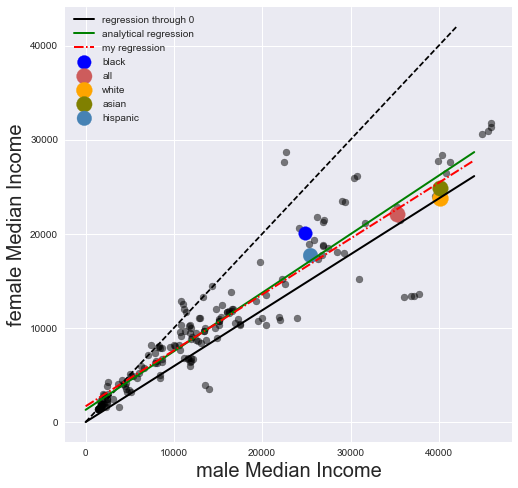

In [108]:
# fit and plot...
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?

## 6. Prediction

In [83]:
samplemalestipend = ([62,000])
model = sm.OLS(all_females_allincomes[mask], all_males_allincomes[mask])

In [84]:
modelfit= model.fit()


In [85]:
modelfit.predict(samplemalestipend)[0]

43.470410136252944

## This is pretty terrible news for women. I wonder if there are any fields where the opposite is true? It might be interesting to do a study in fields where women are dominant? I can't imagine a scenario where women would make more then men -- even if there are more women in the field. 

# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

This data is alarming. To further the study I would look at how age fits into this. For example does a femal asian woman make as much as a male hispanic male? The data shows that if you are asian you are probably maing more than black or hispanic (male and female). I want to know how this is distributed by job type and also by age with each race. It may also be interesting to see as the income increases so does the income disparity. As a white woman becomes more successfull does the income gap increase. If a hispanic woman and a hispanic male are not making much money per year, is the income gap smaller?  